In [49]:
#Graph Visual 1: Which regions are affected the most by the zombie outbreak?

# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the base directory, directory pathing aid by Xpert Learning Assistant
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  # Navigate up two levels to the main project directory

# Search for the CSV file in Stephen's folder
start_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2020', '04-01-2020.csv')

# Save graph as a png file to the desired directory
output_dir = "Images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read 01-01-2023 CSV file into a DataFrame
start_df = pd.read_csv(start_csv_path)

# Dropping unneeded columns for this graph
start_columns_to_drop = start_df.columns[0:2].tolist() + start_df.columns[3:7].tolist() + start_df.columns[8:18].tolist()
infected_trimmed_df = start_df.drop(columns=start_columns_to_drop)
infected_trimmed_df = infected_trimmed_df.rename(columns={'Province_State': 'State'})

infected_trimmed_df

,State,Confirmed
0,South Carolina,4
1,Louisiana,47
2,Virginia,7
3,Idaho,195
4,Iowa,1
...,...,...
2517,Wales,0
2518,NaN,0
2519,Niue,0
2520,NaN,0


### Graph Visual 3:

In [50]:
##Graph Visual 4: Will any of the states be able to accommodate the number of infected in the hospitals available?

# Search for the CSV file in Stephen and Vivian's folder
hospitals_csv_path = os.path.join(base_dir, 'Vivian', 'Resources', 'cleaned_hospitals.csv')

start_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2020', '04-01-2020.csv')

# Read both CSVs into separate DataFrames
hospitals_df = pd.read_csv(hospitals_csv_path)


In [51]:
# Hospital numbers
hospitals_columns_to_drop = hospitals_df.columns[0:1].tolist() + hospitals_df.columns[2:5].tolist() + hospitals_df.columns[7:9].tolist()
hospitals_trimmed_df = hospitals_df.drop(columns=hospitals_columns_to_drop)
hospitals_trimmed_df

,Name,State,Status,Beds,Trauma,Helipad
0,Los Robles Hospital & Medical Center - East Ca...,California,Open,62,Not Available,N
1,East Los Angeles Doctors Hospital,California,Open,127,Not Available,N
2,Southern California Hospital At Hollywood,California,Open,100,Not Available,N
3,Kindred Hospital Baldwin Park,California,Open,95,Not Available,N
4,Lakewood Regional Medical Center,California,Open,172,Not Available,N
...,...,...,...,...,...,...
6964,Cohen Children’S Medical Center,New York,Open,202,Level I Pediatric,N
6965,North Ms Medical Center - Eupora,Mississippi,Open,38,Level Iv,Y
6966,North Ms Medical Center - Iuka,Mississippi,Open,48,Level Iv,Y
6967,Adventist Healthcare White Oak Medical Center,Maryland,Open,178,Not Available,N


In [52]:
# Define a custom function to count occurrences of "Not Available"
def count_not_available(x):
    return (x != 'Not Available').sum()

# Group by State and aggregate the sum of Beds, Trauma, and Y of Helipads
state_summary = hospitals_trimmed_df.groupby('State').agg({
    'Beds': 'sum',
    'Trauma': count_not_available,
    'Helipad': lambda x: (x == 'Y').sum()
}).reset_index()

# Create a DataFrame with US states and their abbreviations
us_states = pd.DataFrame({
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
             'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
             'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
             'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
             'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
             'Wisconsin', 'Wyoming']
})

# Merge the state_summary with us_states on the State column
merged_hospital_df = pd.merge(state_summary, us_states, on='State', how='right')

merged_hospital_df.head()    

,State,Beds,Trauma,Helipad
0,Alabama,18902,60,90
1,Alaska,2061,21,13
2,Arizona,15578,44,73
3,Arkansas,13013,58,90
4,California,104332,71,188


In [56]:
# Group by 'Province_State' and sum the 'Confirmed' values
merged_start_df = infected_trimmed_df.groupby('State').sum().reset_index()

# Sort the merged DataFrame by 'Confirmed' values in descending order
sorted_merged_df = merged_start_df.sort_values(by='Confirmed', ascending=False)

us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
             'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
             'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
             'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
             'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
             'Wisconsin', 'Wyoming']

# Filter the DataFrame to keep only US states
start_us_states_df = sorted_merged_df[sorted_merged_df['State'].isin(us_states)]

# Display the DataFrame with only US states
start_us_states_df.head(5)


,State,Confirmed
89,New York,83948
86,New Jersey,22255
74,Michigan,9315
13,California,9262
71,Massachusetts,7738


In [62]:
#Put the DataFrames together
merged_df = start_us_states_df.merge(merged_hospital_df, left_on='State', right_on='State', how='inner')

# Want to move 'Confirmed' to the far right, grabbing the index of the "Confirmed" column
confirmed_index = merged_df.columns.get_loc('Confirmed')

# then move the column to the far-right
merged_df.insert(len(merged_df.columns)-1, 'Confirmed', merged_df.pop('Confirmed'))

# Sort by 'Beds'
sort_merged_df = merged_df.sort_values(by='Confirmed', ascending=False)

sort_merged_df.head() #CA with the most infected, how can that compare to the total hospital beds in America

,State,Beds,Trauma,Helipad,Confirmed
0,New York,60368,46,73,83948
1,New Jersey,33025,10,39,22255
2,Michigan,26430,39,109,9315
3,California,104332,71,188,9262
4,Massachusetts,22216,20,40,7738


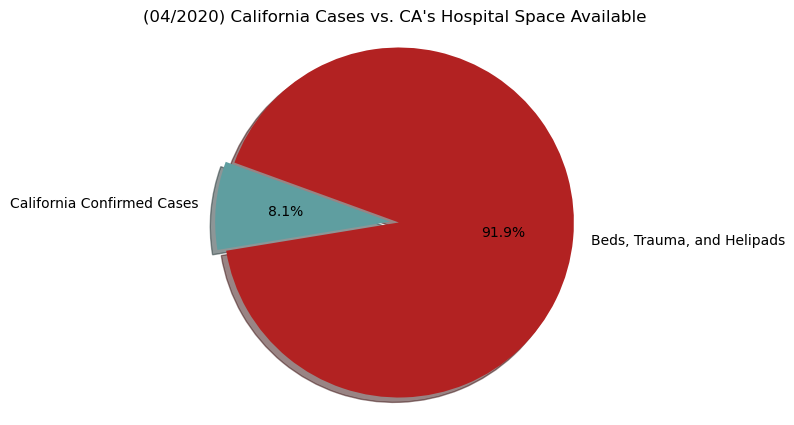

In [69]:
# Extract data for California
california_data = sort_merged_df[sort_merged_df['State'] == 'California']
california_confirmed = california_data['Confirmed'].values[0]

# Calculate the sum of Beds, Trauma, and Helipad for all US states
#us_states_sum = sort_merged_df[['Beds', 'Trauma', 'Helipad']].sum().sum()
california_sum = california_data[['Beds', 'Trauma', 'Helipad']].sum().sum()

# Create labels for the pie chart
labels = ['California Confirmed Cases', 'Beds, Trauma, and Helipads']
sizes = [california_confirmed, california_sum]
explode = (0.05,0)
colors = ['cadetblue', 'firebrick']

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, explode=explode, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')

plt.title("(04/2020) California Cases vs. CA's Hospital Space Available")
plt.savefig(os.path.join(output_dir, '2020-04 California Cases vs. All Hospital Space Available.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()